In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

###### Q1

In [4]:
filename = 'Bank_Personal_Loan_Modelling-1.csv'
dfBank = pd.read_csv(filename, sep=',')
print(dfBank.shape)

(5000, 14)


In [7]:
# shape
print(dfBank.shape)
print('\n ------------------ \n')

# types of attributes
print(dfBank.info())
print('\n ------------------ \n')

print(dfBank.isnull().any())
print('\n ------------------ \n')

#print(dfBank.isna().any())
print('\n ------------------ \n')

# descriptions
print(dfBank.describe().T)
print('\n ------------------ \n')

#NA values check
#print (dfBank.isna().sum())

(5000, 14)

 ------------------ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

 ------------------ 

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg               

###### Q2

   Personal Loan  count   prop
0              0   4520  0.904
1              1    480  0.096


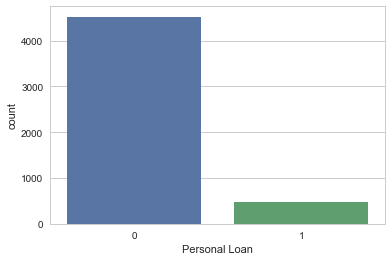

In [8]:
freq = dfBank['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

sns.countplot(dfBank['Personal Loan'])

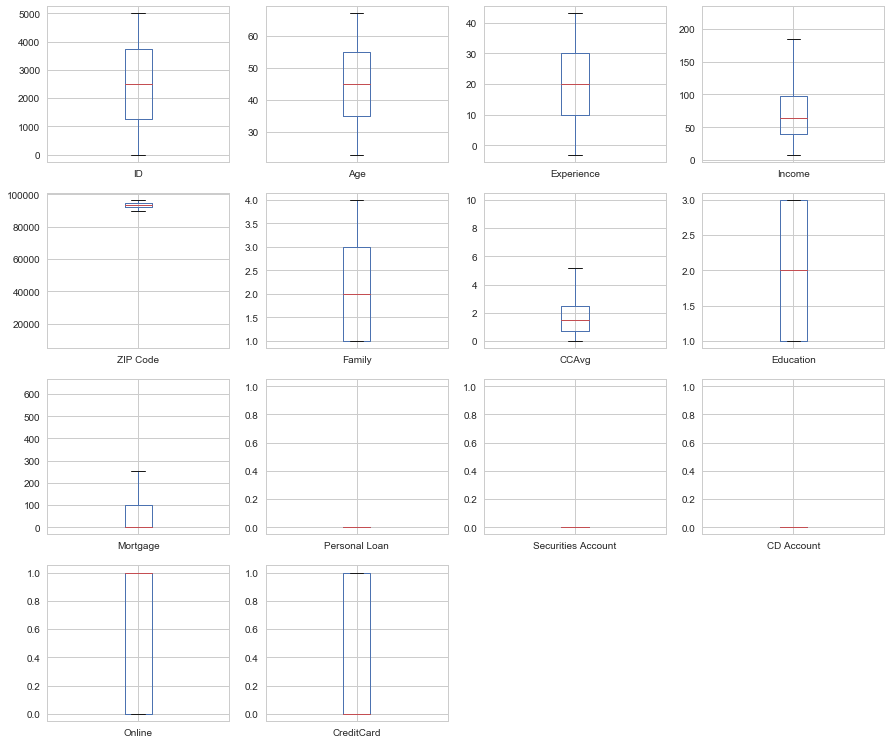

In [9]:
# box and whisker plots
dfBank.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

###### So the income variable has got outliers hence removing those with max value of income column. Similary for Mortage and CCAvg

In [11]:
dfBank['Income']=dfBank['Income'].map(lambda x: 185 if x>185 else x)
dfBank['Income'].describe()

count    5000.000000
mean       73.588600
std        45.555263
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       185.000000
Name: Income, dtype: float64

In [12]:
dfBank['Mortgage']=dfBank['Mortgage'].map(lambda x: 250 if x>250 else x)
dfBank['Mortgage'].describe()

count    5000.0000
mean       50.3472
std        82.6477
min         0.0000
25%         0.0000
50%         0.0000
75%       101.0000
max       250.0000
Name: Mortgage, dtype: float64

In [13]:
dfBank['CCAvg']=dfBank['CCAvg'].map(lambda x: 5 if x>5 else x)
dfBank['CCAvg'].describe()

count    5000.000000
mean        1.817618
std         1.420930
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         5.000000
Name: CCAvg, dtype: float64

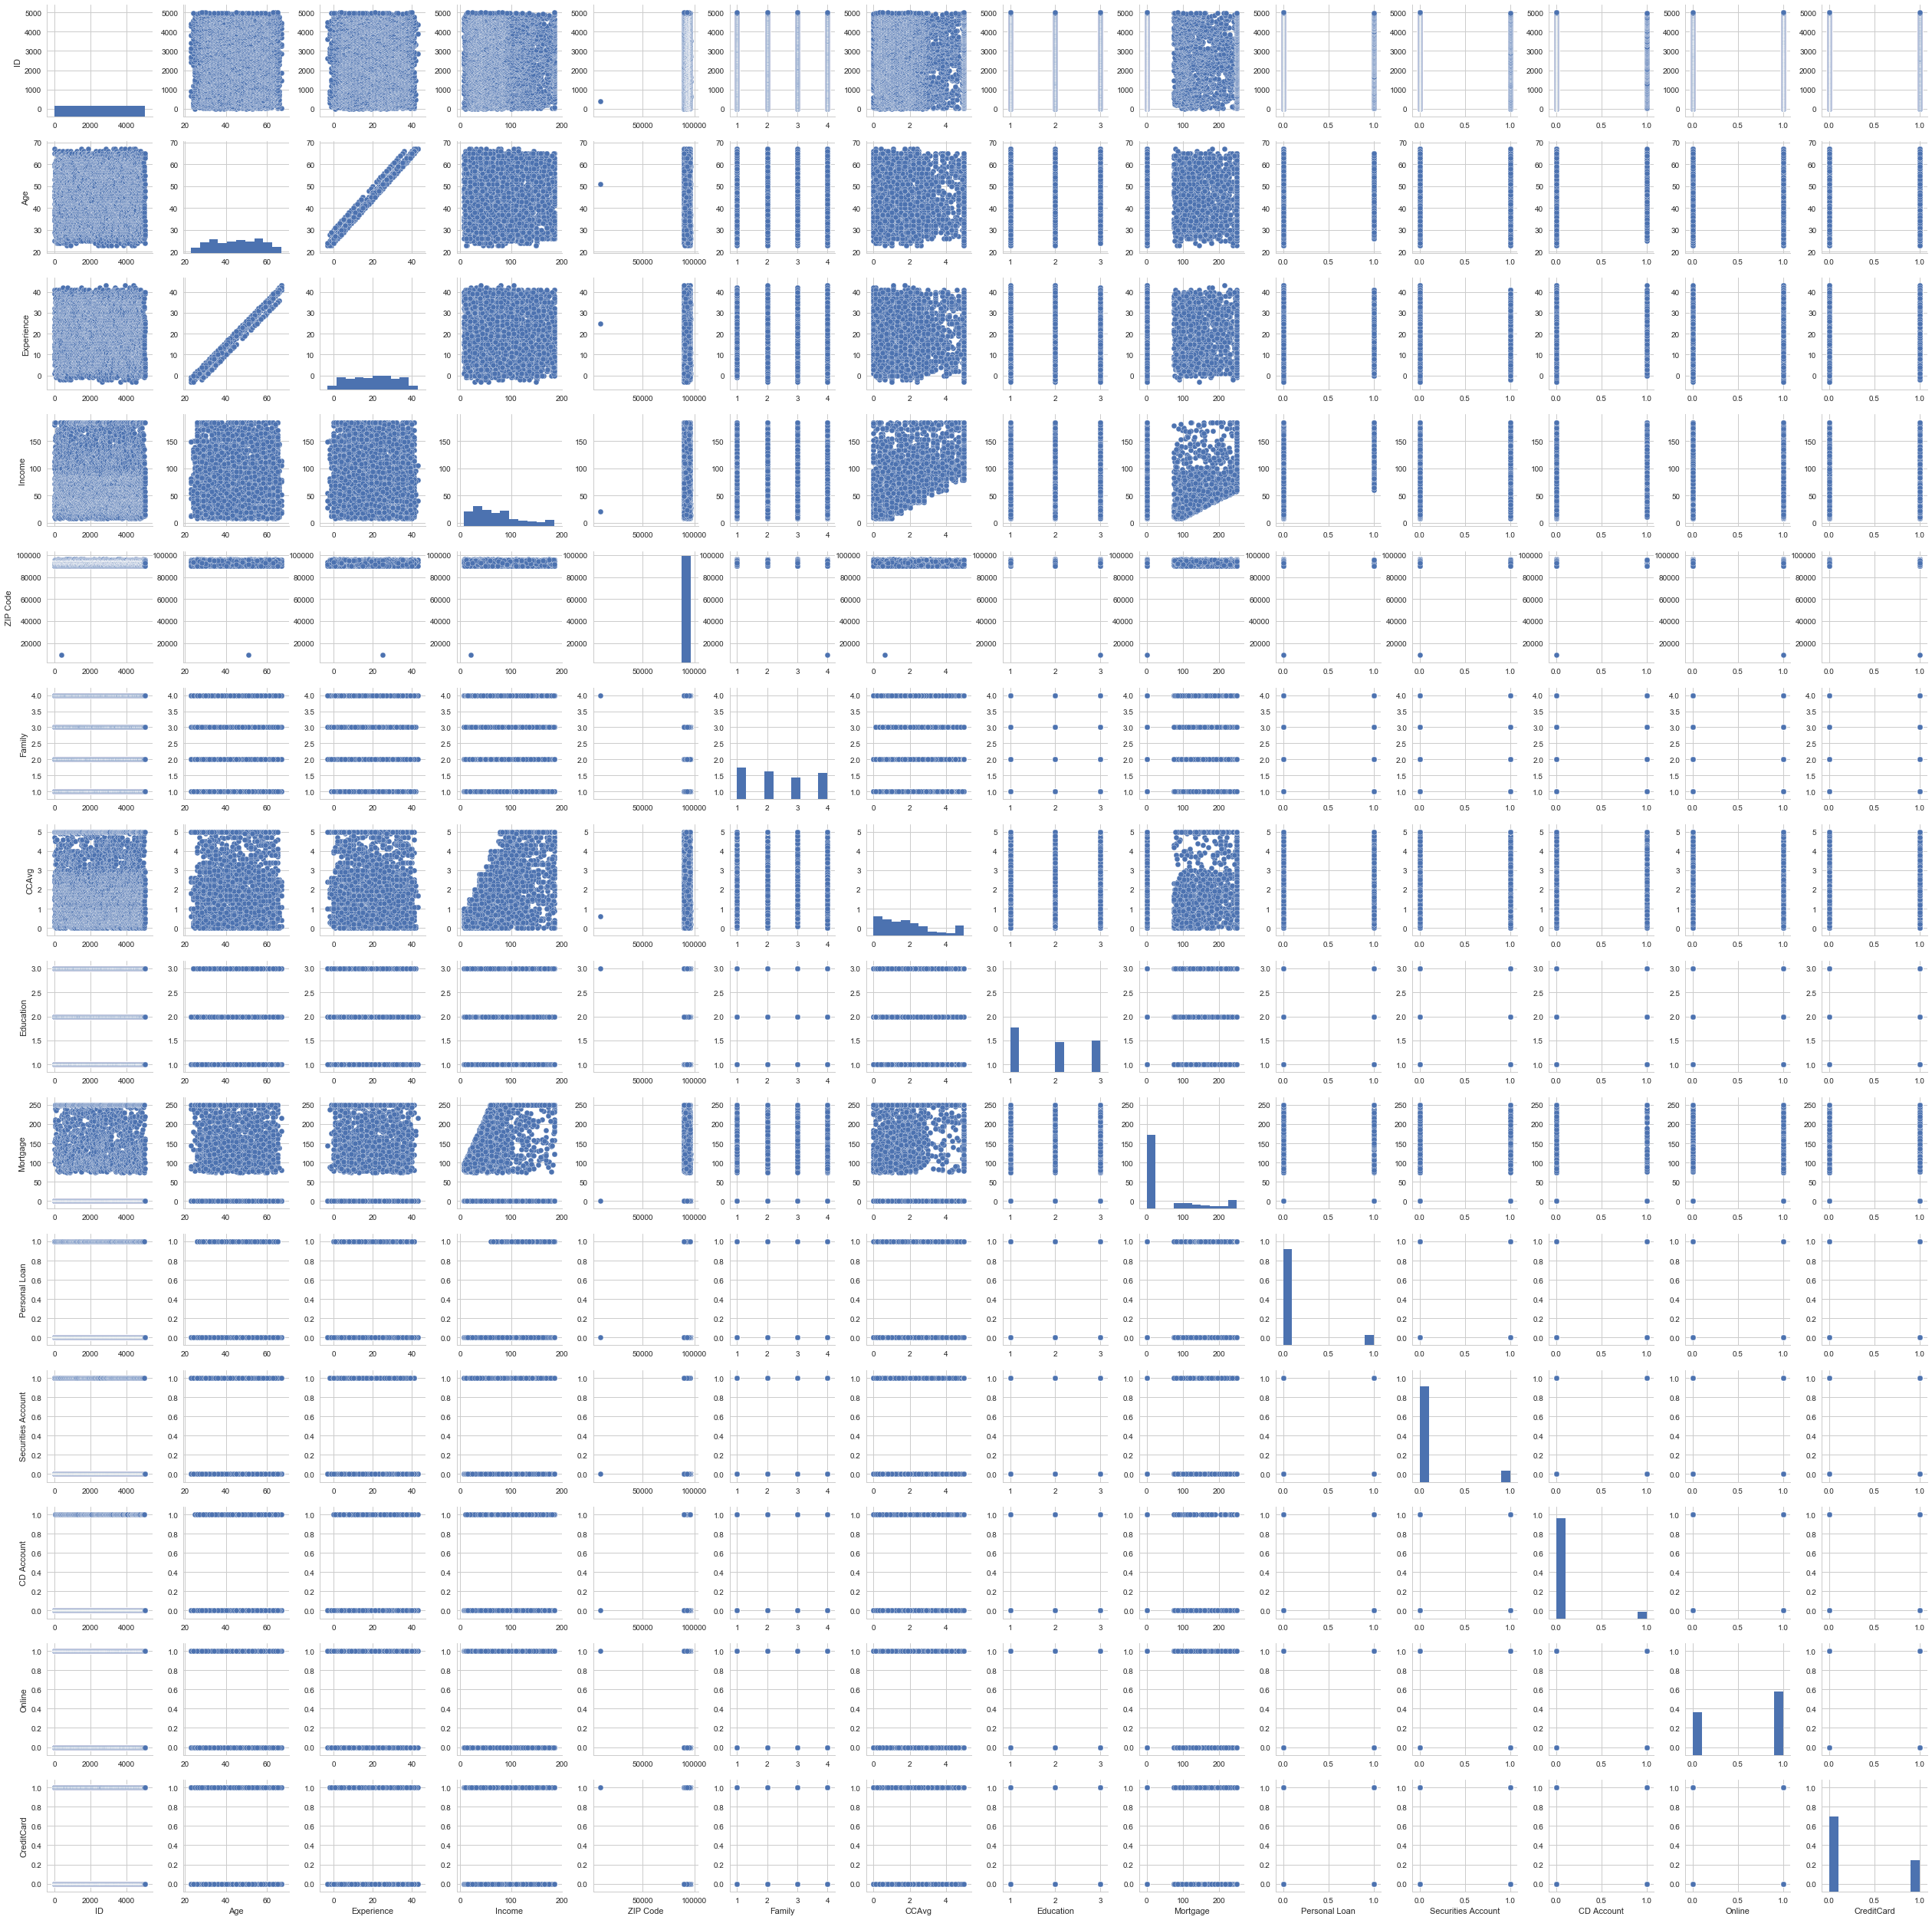

In [14]:
#Checking the relationship of all the independent/predicted variables using scatter plot/pairplot
sns.pairplot(dfBank)

###### From the above plot we can see that age and expenses are highly correlated. Rest no one is correlated to each other.

In [15]:
##lets check the values of correlation between them.
dfBank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.018045,0.013432,-0.016797,-0.017322,0.021463,-0.017496,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.054937,-0.029216,-0.046418,-0.051560,0.041334,-0.011986,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046223,-0.028626,-0.052563,-0.050301,0.013152,-0.010529,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.018045,-0.054937,-0.046223,1.000000,-0.016535,-0.157648,0.635322,-0.187494,0.133414,0.504611,-0.002531,0.170287,0.014112,-0.002431
ZIP Code,0.013432,-0.029216,-0.028626,-0.016535,1.000000,0.011778,-0.005273,-0.017377,0.008925,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157648,0.011778,1.000000,-0.102502,0.064929,-0.010514,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.017322,-0.051560,-0.050301,0.635322,-0.005273,-0.102502,1.000000,-0.124997,0.067519,0.381990,0.020644,0.141850,-0.004483,-0.006599
Education,0.021463,0.041334,0.013152,-0.187494,-0.017377,0.064929,-0.124997,1.000000,-0.021710,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.017496,-0.011986,-0.010529,0.133414,0.008925,-0.010514,0.067519,-0.021710,1.000000,0.092047,-0.005574,0.068880,-0.007198,-0.003466
Personal Loan,-0.024801,-0.007726,-0.007413,0.504611,0.000107,0.061367,0.381990,0.136722,0.092047,1.000000,0.021954,0.316355,0.006278,0.002802


###### The correlation between age and income is 99.42%.

In [16]:
print(round(sum(dfBank['Personal Loan'])*100/len(dfBank),1))

9.6


###### Q3

In [17]:
dfBank.rename(columns={'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code','CD Account': 'CD_Account','Securities Account':'Securities_Account'},inplace=True)
dfBank.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###### Q4

In [18]:
X = dfBank.drop('Personal_Loan', axis=1)
y = dfBank['Personal_Loan']

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=123)

In [19]:
#Model development
#spliting into development, validation and hold-out sample
mydata = dfBank.copy()
mydata_dev, mydata_val, mydata_holdout = np.split(
        mydata.sample(frac=1, random_state=1212), 
        [int(.5*len(mydata)), 
         int(.8*len(mydata))]
        )

(len(mydata_dev), len(mydata_val), len(mydata_holdout))

(2500, 1500, 1000)

In [20]:
print(round(sum(mydata_dev['Personal_Loan'])*100/len(mydata_dev),1),
    round(sum(mydata_val['Personal_Loan'])*100/len(mydata_val),1),
    round(sum(mydata_holdout['Personal_Loan'])*100/len(mydata_holdout),1))

9.6 9.2 10.3


###### Logistic Regression

In [21]:
import statsmodels.formula.api as sm
import statsmodels.api

## Running regression with all the variables
mylogit = sm.glm(formula = """Personal_Loan ~ Income + Family + CCAvg + Education 
        + Mortgage + Securities_Account + CD_Account + Online""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2491
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -305.27
Date:                Sun, 03 Feb 2019   Deviance:                       610.53
Time:                        22:41:50   Pearson chi2:                 2.81e+03
No. Iterations:                     8                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -14.6872      0.883    -16.642      0.000     -16.417     -12.957
Income                 0.0570      0.004     14.498      0.000       0.049       0.065
Family                 0.7231      0.107      6.738      0.000       0.513       0.933
CCAvg                  0.3366      0.078      4.302      0.000       0.183       0.490
Education              1.7847      0.166     10.759      0.000       1.460       2.110
Mortgage               0.0007      0.001      0.675      0.500      -0.001       0.003
Securities_Account     0.0910      0.401      0.227      0.821      -0.696       0.878
CD_Account             2.9085      0.400      7.271      0.000       2.124       3.693
Online                -0.5861      0.225     -2.603      0.009      -1.027      -0.145
======================================================================================
"""

###### Dropping Securities_Account and Mortgage since its P value is too high

In [22]:
import statsmodels.formula.api as sm
import statsmodels.api

## Running regression with all the variables
mylogit = sm.glm(formula = """Personal_Loan ~ Income + Family + CCAvg + Education 
         + CD_Account + Online """ , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2493
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -305.53
Date:                Sun, 03 Feb 2019   Deviance:                       611.06
Time:                        22:41:50   Pearson chi2:                 2.82e+03
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.6195      0.871    -16.779      0.000     -16.327     -12.912
Income         0.0571      0.004     14.644      0.000       0.049       0.065
Family         0.7208      0.107      6.754      0.000       0.512       0.930
CCAvg          0.3335      0.078      4.277      0.000       0.181       0.486
Education      1.7824      0.166     10.761      0.000       1.458       2.107
CD_Account     2.9593      0.356      8.303      0.000       2.261       3.658
Online        -0.5944      0.224     -2.658      0.008      -1.033      -0.156
==============================================================================
"""

###### After adding coef and std err of each variable, their sign does not change. Hence, the Betas are normal

In [23]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Personal_Loan ~ Income + Family + CCAvg + Education 
         + CD_Account + Online """,mydata_dev)
vif 

#VIF is less than 2, hence the model is robust now

,Variable,VIF
0,Intercept,17.1
1,Income,1.8
2,Family,1.0
3,CCAvg,1.7
4,Education,1.0
5,CD_Account,1.1
6,Online,1.0


In [24]:
## Predicting Probabilities
mydata_dev["prob"] = mylogit.predict(mydata_dev)## Classification
mydata_dev.prob.quantile(
  [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01    0.000016
0.05    0.000070
0.10    0.000156
0.25    0.000753
0.50    0.004589
0.75    0.043509
0.90    0.311563
0.95    0.760031
0.99    0.989015
1.00    0.999438
Name: prob, dtype: float64

In [25]:
mydata_dev["class"] = mydata_dev["prob"].map(
        lambda x: 1 if x > mydata_dev.prob.quantile(0.95) else 0)

mydata_dev["class"]

1622    0
802     0
1941    0
2414    0
4237    0
3829    0
3882    0
3712    0
2623    0
1785    0
1175    0
3332    0
2534    0
2109    1
2877    0
4598    0
3727    0
963     0
4582    0
3761    0
361     0
2765    0
522     0
3486    0
2084    0
2484    0
1320    0
4151    0
3697    0
118     0
       ..
4548    0
4777    0
2703    0
231     0
4439    0
4477    0
1921    0
610     0
2526    0
582     0
4336    0
79      0
4456    0
1292    1
3226    0
2022    0
2670    0
2659    0
3743    0
1984    0
2115    0
1109    0
2929    0
1183    0
1361    0
2979    0
1318    0
1805    0
2391    0
1222    0
Name: class, Length: 2500, dtype: int64

In [26]:
mydata_dev['decile']=pd.qcut(mydata_dev.prob, 10, labels=False)
## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)

RRate = Response_Rate(mydata_dev,"prob","Personal_Loan")
RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9,0.320668,0.999438,0.719695,250.0,174.0,76.0,69.6,174.0,76.0,72.80,3.36,69.44
8,8,0.069610,0.310551,0.160285,250.0,45.0,205.0,18.0,219.0,281.0,91.63,12.43,79.20
7,7,0.027511,0.069501,0.045122,250.0,13.0,237.0,5.2,232.0,518.0,97.07,22.91,74.16
6,6,0.010957,0.027507,0.017775,250.0,3.0,247.0,1.2,235.0,765.0,98.33,33.83,64.50
5,5,0.004599,0.010951,0.007124,250.0,1.0,249.0,0.4,236.0,1014.0,98.74,44.85,53.89
4,4,0.002300,0.004579,0.003261,250.0,1.0,249.0,0.4,237.0,1263.0,99.16,55.86,43.30
3,3,0.001094,0.002287,0.001600,250.0,1.0,249.0,0.4,238.0,1512.0,99.58,66.87,32.71
2,2,0.000487,0.001094,0.000759,250.0,1.0,249.0,0.4,239.0,1761.0,100.00,77.89,22.11
1,1,0.000156,0.000483,0.000309,250.0,0.0,250.0,0.0,239.0,2011.0,100.00,88.94,11.06
0,0,0.000005,0.000155,0.000070,250.0,0.0,250.0,0.0,239.0,2261.0,100.00,100.00,0.00


In [27]:
mydata_dev.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,prob,class,decile
1622,1623,39,14,24,94611,2,0.3,2,0,0,0,0,1,0,0.000160,0,1
802,803,36,12,51,92521,3,2.0,1,214,0,0,0,1,0,0.000457,0,1
1941,1942,43,19,58,95307,2,3.2,1,0,0,0,0,1,0,0.000494,0,2
2414,2415,34,10,134,91775,1,4.0,1,0,0,0,0,0,0,0.041757,0,7
4237,4238,60,34,78,90401,3,4.4,1,0,0,1,0,0,0,0.008536,0,5


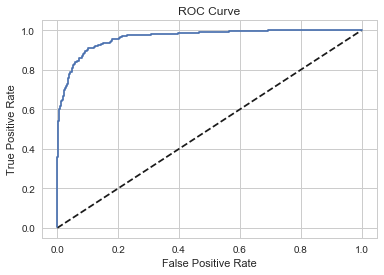

0.8057826081324404

In [28]:
#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(mydata_dev["Personal_Loan"],mydata_dev["prob"] )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
KS

In [29]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(mydata_dev["Personal_Loan"],mydata_dev["prob"])
auc

0.96355890958012802

In [30]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(mydata_dev['Personal_Loan'],mydata_dev["class"]),
     "accuracy": accuracy_score(mydata_dev['Personal_Loan'],mydata_dev["class"])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )

confusion matrix 
 [[2257    4]
 [ 118  121]] 

classification accuracy  0.9512


###### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [32]:
kbankdf = dfBank

In [33]:
## Target Variable Frequency Distribution
freq = kbankdf['Personal_Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Personal_Loan,count,prop
0,0,4520,0.904
1,1,480,0.096


In [34]:
## Creating the K Nearest Neighbour Classifier Object
## weights options are 'uniform' 'distance'
## weights = 'distance' - weighs points by inverse of their distance
NNH = KNeighborsClassifier(n_neighbors = 21, weights = 'uniform', 
                           metric = 'euclidean')

In [35]:
## scaling all variables
bankdf_z = kbankdf.apply(zscore)
bankdf_z.shape

(5000, 14)

In [36]:
k_y_train = train_y
k_x_train = train_X

## Fit the model
NNH.fit(k_x_train, k_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [38]:
## Get the probability
tempkdf = pd.DataFrame(NNH.predict_proba(train_X))[1]
#tempkdf.isna().sum()

In [40]:
knndf = pd.DataFrame(tempkdf)
knndf['prob'] = pd.DataFrame(tempkdf)
#knndf.isna().sum()

In [41]:
knndf['prob'] = np.where(knndf['prob'] >= 0.096, 1, 0)

In [42]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(train_y,knndf["prob"]),
     "accuracy": accuracy_score(train_y,knndf["prob"])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )

confusion matrix 
 [[2478  688]
 [ 123  211]] 

classification accuracy  0.768285714286


###### Naive Bayes Technique

###### Since this is binomial model, we will use Bernoulli model

In [43]:
nbbankdf = dfBank

In [44]:
## Target Variable Frequency Distribution
freq = kbankdf['Personal_Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Personal_Loan,count,prop
0,0,4520,0.904
1,1,480,0.096


In [45]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
## Get the probability
tempdf = pd.DataFrame(NB.predict_proba(train_X))[1]
#tempdf.isna().sum()

In [48]:
nbbankdf = pd.DataFrame(tempdf)

nbbankdf['prob'] = pd.DataFrame(tempdf)
nbbankdf['prob'].shape

(3500,)

In [49]:
nbbankdf['prob'] = np.where(nbbankdf['prob'] >= 0.096, 1, 0)
pd.DataFrame(nbbankdf['prob']).shape

(3500, 1)

In [50]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(train_y,nbbankdf['prob']),
     "accuracy": accuracy_score(train_y,nbbankdf['prob'])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )

confusion matrix 
 [[3048  118]
 [ 236   98]] 

classification accuracy  0.898857142857


###### Q6

###### Since we got accuracy score for Logistic regression higher than remaining two models, it was the better one.(accuracies of logistic and knn are nearly equal.)